In [62]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure
import numpy

In [63]:
h = 0.01
parameter_t = torch.arange(0, 1, h)
parameter_x = torch.arange(-1, 1, h)
parameter_y = torch.arange(-1, 1, h)

In [64]:
tt, xx, yy = numpy.meshgrid(parameter_t, parameter_x, parameter_y, indexing="ij")

### Initial guess

In [65]:
zz = numpy.zeros(xx.shape)

In [83]:
kernel = generate_binary_structure(3,1).astype(float)
kernel[1,1,1] = 0

kernel[1, 1, 0] = -1
kernel[1, 1, 2] = -1

kernel /= 2

In [84]:
kernel = kernel.T
print(kernel)

[[[ 0.   0.   0. ]
  [ 0.  -0.5  0. ]
  [ 0.   0.   0. ]]

 [[ 0.   0.5  0. ]
  [ 0.5  0.   0.5]
  [ 0.   0.5  0. ]]

 [[ 0.   0.   0. ]
  [ 0.  -0.5  0. ]
  [ 0.   0.   0. ]]]


In [89]:
for i in tqdm(range(500)):
    new_zz = convolve(zz, kernel, mode="constant")
#     new_zz[:, +0] = parameter_t * 0 
#     new_zz[:, -1] = parameter_t * 0
    new_zz[0] = 0
    new_zz[0] = numpy.exp(-xx**2-yy**2)[0]
    
    zz = new_zz.copy()

  8%|███▏                                      | 38/500 [00:02<00:34, 13.22it/s]


KeyboardInterrupt: 

(0.0, 1.0)

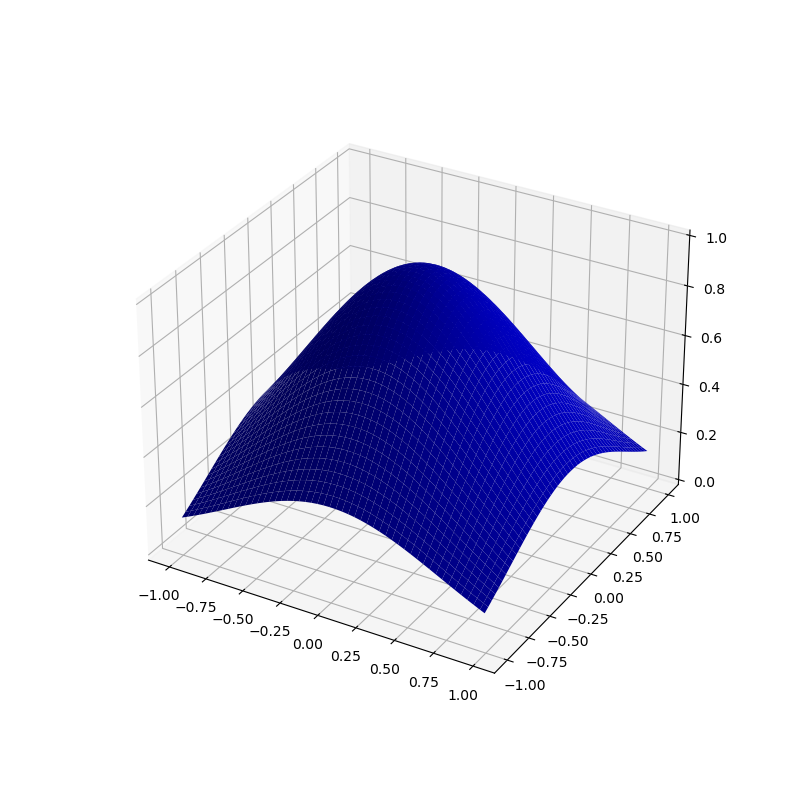

In [90]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(xx[0], yy[0], zz[0], color='blue')
ax.set_zlim(0, 1)